Source of code: this quarter's course Computation and the Identification of Cultural Patterns, week 6

This script did analysis based on "year bins"(1950s, 1960s,...2020s), and analyzed the counts of different words. We also analyzed social trend using 'LIWC2007_English100131.dic', which have different categories containing different word.

# functions like social_connection:
Takes lyrics of a song and the LIWC2007dict. It computes the percentage of words belong to 'social' category. Words like "mate," "talk," "child" belong to this category.

# functions like damn:
Takes lyrics of a song and computes the percentage of the word "damn" in it.

# readDict:
This function reads in an LIWC-style dictionary

# wordCount:
This function counts and categorizes words based on the LIWC dictionary

In [8]:
import pandas as pd
import string
import nltk
import collections
import re

In [9]:
lyrics_df = pd.read_csv("../data/cleaned_lyrics.csv")
lyrics_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,no.,year,song,artist(s),song_wiki_url,artist_wiki_url,lyrics
0,0,0,0,1,1958,"""Volare""",Domenico Modugno,['https://en.wikipedia.org/wiki/Volare_(song)'],['https://en.wikipedia.org/wiki/Domenico_Modug...,Penso che un sogno cosi` non ritorni mai piu` ...
1,1,1,1,2,1958,"""All I Have to Do Is Dream""",The Everly Brothers,['https://en.wikipedia.org/wiki/All_I_Have_to_...,['https://en.wikipedia.org/wiki/The_Everly_Bro...,Dream dream dream dream Dream dream drea...
2,2,2,2,3,1958,"""Don't""",Elvis Presley,['https://en.wikipedia.org/wiki/Don%27t_(Elvis...,['https://en.wikipedia.org/wiki/Elvis_Presley'],Don't don't that's what you say Each time t...
3,3,3,3,4,1958,"""Witch Doctor""",David Seville,['https://en.wikipedia.org/wiki/Witch_Doctor_(...,['https://en.wikipedia.org/wiki/Ross_Bagdasari...,{Movie version - DJ: Yeah! In the place to be!...
4,4,4,4,5,1958,"""Patricia""",Perez Prado,['https://en.wikipedia.org/wiki/Patricia_(Pere...,['https://en.wikipedia.org/wiki/Perez_Prado'],Kiss her and your lips will always want Patric...
...,...,...,...,...,...,...,...,...,...,...
6266,6346,6346,6346,96,2021,"""Things a Man Oughta Know""",Lainey Wilson,['https://en.wikipedia.org/wiki/Things_a_Man_O...,['https://en.wikipedia.org/wiki/Lainey_Wilson'],I can hook a trailer on a two-inch hitch I ca...
6267,6347,6347,6347,97,2021,"""Throat Baby""",BRS Kash,['https://en.wikipedia.org/wiki/Throat_Baby_(G...,['https://en.wikipedia.org/wiki/BRS_Kash'],What's happenin' Chi Chi? Sexy lil' bitc...
6268,6348,6348,6348,98,2021,"""Tombstone""",Rod Wave,['https://en.wikipedia.org/wiki/Tombstone_(son...,['https://en.wikipedia.org/wiki/Rod_Wave'],Damn this motherfucker too crazy Saucii Let...
6269,6349,6349,6349,99,2021,"""Drinkin' Beer. Talkin' God. Amen.""",Chase Rice,['https://en.wikipedia.org/wiki/Drinkin%27_Bee...,"['https://en.wikipedia.org/wiki/Chase_Rice', '...","Firewood crackle in the fall air ""Red Dirt"" p..."


In [4]:
def year_bin(x):
    if 1958 <= x < 1960:
        return "1950s"
    if 1960 <= x < 1970:
        return "1960s"
    if 1970 <= x < 1980:
        return "1970s"
    if 1980 <= x < 1990:
        return "1980s"
    if 1990 <= x < 2000:
        return "1990s"
    if 2000 <= x < 2010:
        return "2000s"
    if 2010 <= x < 2020:
        return "2010s"
    else:
        return "2020s"

In [4]:
lyrics_df['year_bin'] = lyrics_df['year'].apply(year_bin)

In [5]:
lyrics = lyrics_df["lyrics"]

In [6]:
lyrics

0       Penso che un sogno cosi` non ritorni mai piu` ...
1        Dream  dream  dream  dream Dream  dream  drea...
2        Don't  don't  that's what you say Each time t...
3       {Movie version - DJ: Yeah! In the place to be!...
4       Kiss her and your lips will always want Patric...
                              ...                        
6266     I can hook a trailer on a two-inch hitch I ca...
6267      What's happenin'  Chi Chi?    Sexy lil' bitc...
6268     Damn  this motherfucker too crazy  Saucii Let...
6269     Firewood crackle in the fall air "Red Dirt" p...
6270       One  two One  two  three  four Dice  Ra-Rau...
Name: lyrics, Length: 6271, dtype: object

In [5]:
lyrics_df['tokens'] = lyrics_df['lyrics'].apply(lambda x: x.split())
alllyrics = [word for tokens in lyrics_df['tokens'].tolist() for word in tokens]

In [6]:
countdict = {}  #from word_freq function in "lyrics_analysis.ipynb"
for word in alllyrics:
    if word not in countdict:
        countdict[word] = 0
    countdict[word] += 1

In [9]:
sorted(countdict.items(), key = lambda x: x[1], reverse = True)

[('the', 112930),
 ('I', 92426),
 ('you', 81848),
 ('to', 64002),
 ('and', 58125),
 ('a', 54925),
 ('me', 45303),
 ('in', 36896),
 ('it', 36713),
 ('of', 35563),
 ('my', 32879),
 ('on', 27712),
 ('that', 26625),
 ("I'm", 22206),
 ('your', 21941),
 ('be', 20923),
 ('And', 20468),
 ('is', 19311),
 ('for', 19271),
 ('love', 19218),
 ('with', 18111),
 ('know', 16619),
 ('all', 15863),
 ('like', 15852),
 ('up', 15151),
 ('You', 14358),
 ("don't", 13903),
 ('we', 12640),
 ('do', 12257),
 ('The', 11202),
 ('so', 11161),
 ('can', 11093),
 ('get', 11057),
 ('got', 10771),
 ('no', 10771),
 ('baby', 10693),
 ('this', 10501),
 ('just', 10439),
 ('-', 10203),
 ('yeah', 10035),
 ('go', 9863),
 ('what', 9762),
 ('out', 9643),
 ('was', 9469),
 ('have', 9336),
 ('down', 8963),
 ('he', 8914),
 ('at', 8777),
 ('when', 8737),
 ('her', 8670),
 ('want', 8410),
 ('one', 8284),
 ('But', 8237),
 ('his', 8088),
 ('are', 8086),
 ('Oh', 8057),
 ('by', 8008),
 ("it's", 7764),
 ('from', 7625),
 ('but', 7475),
 ('no

top 5 verbs are "know", "like", "go", "have", "want".

In [10]:
def get_tokens(text):
    '''
    Gets all tokens (including stop words), excluding punctuation
    '''
    # drop punctuation, but keep stopwords for initial word counting
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize remaining words and make a list of them for input `text`
    tokens = [i for i in nltk.word_tokenize(text.lower())]
    return tokens

In [11]:
def know(text):
    '''
    Percentage of the word "know" in each song's lyrics
    '''
    text = get_tokens(text)
    know_count = text.count("know")
    return know_count / len(text)

def like(text):
    '''
    Percentage of the word "like" in each song's lyrics
    '''
    text = get_tokens(text)
    like_count = text.count("like")
    return like_count / len(text)

def go(text):
    '''
    Percentage of the word "go" in each song's lyrics
    '''
    text = get_tokens(text)
    go_count = text.count("go")
    return go_count / len(text)

def have(text):
    '''
    Percentage of the word "have" in each song's lyrics
    '''
    text = get_tokens(text)
    have_count = text.count("have")
    return have_count / len(text)

def want(text):
    '''
    Percentage of the word "want" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("want")
    return want_count / len(text)

know = lyrics.apply(know)
like = lyrics.apply(like)
go = lyrics.apply(go)
have = lyrics.apply(have)
want = lyrics.apply(want)

In [12]:
def love(text):
    '''
    Percentage of the word "love" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("love")
    return want_count / len(text)

def dream(text):
    '''
    Percentage of the word "dream" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("dream")
    return want_count / len(text)

def heart(text):
    '''
    Percentage of the word "heart" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("heart")
    return want_count / len(text)
love = lyrics.apply(love)
dream = lyrics.apply(dream)
heart = lyrics.apply(heart)

In [13]:
def dance(text):
    '''
    Percentage of the word "dance" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("dance")
    return want_count / len(text)

def rock(text):
    '''
    Percentage of the word "rock" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("rock")
    return want_count / len(text)

def music(text):
    '''
    Percentage of the word "music" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("music")
    return want_count / len(text)
dance = lyrics.apply(dance)
rock = lyrics.apply(rock)
music = lyrics.apply(music)

In [14]:
def fuck(text):
    '''
    Percentage of the word "fuck" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("fuck")
    return want_count / len(text)

def damn(text):
    '''
    Percentage of the word "damn" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("damn")
    return want_count / len(text)

def shit(text):
    '''
    Percentage of the word "shit" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("shit")
    return want_count / len(text)

def hell(text):
    '''
    Percentage of the word "hell" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("hell")
    return want_count / len(text)

def bitch(text):
    '''
    Percentage of the word "bitch" in each song's lyrics
    '''
    text = get_tokens(text)
    want_count = text.count("bitch")
    return want_count / len(text)
fuck = lyrics.apply(fuck)
damn = lyrics.apply(damn)
shit = lyrics.apply(shit)
hell = lyrics.apply(hell)
bitch = lyrics.apply(bitch)

In [15]:
def first_p_sg_perc(text):
    '''
    Percentage of first person sigulars in each song's lyrics
    '''
    text = get_tokens(text)
    first_p_sg_count = (text.count("i")
                        + text.count("me")
                        + text.count("my")
                        + text.count("mine"))
    
    return first_p_sg_count / len(text)

def first_p_pl_perc(text):
    '''
    Percentage of first person plurals in each song's lyrics
    '''
    text = get_tokens(text)
    first_p_pl_count = (text.count("we")
                        + text.count("us")
                        + text.count("our")
                        + text.count("ours"))
    
    return first_p_pl_count / len(text)

agency = lyrics.apply(first_p_sg_perc)
communion = lyrics.apply(first_p_pl_perc)

In [16]:
def female(text):
    '''
    Percentage of words referring to a female in each song's lyrics
    '''
    text = get_tokens(text)
    female_count = (text.count("she")
                        + text.count("her")
                        + text.count("hers"))
    
    return female_count / len(text)

def male(text):
    '''
    Percentage of words referring to a male in each song's lyrics
    '''
    text = get_tokens(text)
    male_count = (text.count("he")
                        + text.count("him")
                        + text.count("his"))
    
    return male_count / len(text)

def other(text):
    '''
    Percentage of words referring to other genders in each song's lyrics
    '''
    text = get_tokens(text)
    other_count = (text.count("they")
                        + text.count("them")
                        + text.count("their")
                        + text.count("theirs"))
    return other_count / len(text)


female = lyrics.apply(female)
male = lyrics.apply(male)
other= lyrics.apply(other)

In [17]:
length = lyrics.apply(len)

In [18]:
def social_connection(text, liwc_dict):
    '''
    Compute rel. percentage of LIWC 2007 'social' category:
    words like "mate," "talk," "child"
    '''
    
    liwc_counts = wordCount(text, liwc_dict)
    return liwc_counts[0]['social'] / liwc_counts[2]

In [19]:
def antisocial_perc(text, liwc_dict):
    '''
    Compute rel. percentage of LIWC 2007 'anger' and 'swear' categories:
    words like "kill," "hate," "annoyed," "damn," "piss", "fuck"
    '''
    liwc_counts = wordCount(text, liwc_dict)
    
    return (liwc_counts[0]['anger'] + liwc_counts[0]['swear']) / liwc_counts[2]

In [20]:
def curse_words_perc(text, liwc_dict):
    '''
    Compute counts of LIWC 2007 'swear' categories:
    words like "damn," "piss", "fuck"
    '''
    liwc_counts = wordCount(text, liwc_dict)
    
    return liwc_counts[0]['swear'] / liwc_counts[2]

In [21]:
def sexual_perc(text, liwc_dict):
    '''
    Compute counts of LIWC 2007 'sexual' categories:
    words like "horny," "love", "incest"
    '''
    liwc_counts = wordCount(text, liwc_dict)
    
    return liwc_counts[0]['sexual'] / liwc_counts[2]

In [22]:
def religion_perc(text, liwc_dict):
    '''
    Compute counts of LIWC 2007 'religion' categories:
    words like "Altar", "church", "mosque"
    '''
    liwc_counts = wordCount(text, liwc_dict)
    
    return liwc_counts[0]['relig'] / liwc_counts[2]

In [23]:
def money_perc(text, liwc_dict):
    '''
    Compute counts of LIWC 2007 'money' categories:
    words like "Audit", "cash", "owe"
    '''
    liwc_counts = wordCount(text, liwc_dict)
    
    return liwc_counts[0]['money'] / liwc_counts[2]

In [24]:
def positive_perc(text, liwc_dict):
    '''
    Compute rel. percentage of LIWC 2007 'posemo' categories:
    words like "love," "nice," "sweet"
    '''
    liwc_counts = wordCount(text, liwc_dict)
    
    return liwc_counts[0]['posemo'] / liwc_counts[2]

In [3]:
def readDict(dictionaryPath):
    '''
    Function to read in an LIWC-style dictionary
    '''
    catList = collections.OrderedDict()
    catLocation = []
    wordList = {}
    finalDict = collections.OrderedDict()

    with open(dictionaryPath, "r") as dictionaryFile:
        for idx, item in enumerate(dictionaryFile):
            if "%" in item:
                catLocation.append(idx)
        if len(catLocation) > 2:
            sys.exit("Invalid dictionary format. Check the number/locations of the category delimiters (%).")

    with open(dictionaryPath, "r") as dictionaryFile:
        lines = dictionaryFile.readlines()

    for line in lines[catLocation[0] + 1:catLocation[1]]:
        catList[re.split(r'\t+', line)[0]] = [re.split(r'\t+', line.rstrip())[1]]

    for idx, line in enumerate(lines[catLocation[1] + 1:]):
        workingRow = re.split('\t', line.rstrip())
        wordList[workingRow[0]] = list(workingRow[1:])

    for key, values in wordList.items():
        if not key in finalDict:
            finalDict[key] = []
        for catnum in values:
            workingValue = catList[catnum][0]
            finalDict[key].append(workingValue)
    return (finalDict, catList.values())

In [6]:
def wordCount(data, dictOutput):
    '''
    Function to count and categorize words based on an LIWC dictionary
    '''
    finalDict, catList = dictOutput
    outList = collections.OrderedDict()
    nonDict = 0
    data = data.lower()

    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(data)

    fdist = nltk.FreqDist(tokens)
    wc = len(tokens)

    porter = nltk.PorterStemmer()
    stems = [porter.stem(word) for word in tokens]
    fdist_stem = nltk.FreqDist(stems)

    for cat in catList:
        outList[cat[0]] = 0

    fdist_dict = dict(fdist)
    fdist_stem_dict = dict(fdist_stem)

    classified = 0

    for key in finalDict:
        if "*" in key and key[:-1] in fdist_stem_dict:
            classified = classified + fdist_stem_dict[key[:-1]]
            for cat in finalDict[key]:
                outList[cat] = outList[cat] + fdist_stem_dict[key[:-1]]
        elif key in fdist_dict:
            classified = classified + fdist_dict[key]
            for cat in finalDict[key]:
                outList[cat] = outList[cat] + fdist_dict[key]

    if wc > 0:
        percClassified = (float(classified) / float(wc)) * 100
    else:
        percClassified = 0
        
    return [outList, tokens, wc, classified, percClassified]

In [7]:
liwc_dict = readDict('../data/LIWC2007_English100131.dic')

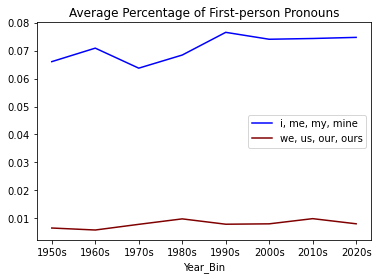

In [10]:
#this takes a long time to run
#social_connection = lyrics.apply(social_connection, args = [liwc_dict])
#antisocial = lyrics.apply(antisocial_perc, args = [liwc_dict])
#positive = lyrics.apply(positive_perc, args = [liwc_dict])
#curse_words = lyrics.apply(curse_words_perc, args = [liwc_dict])
#sexual_words = lyrics.apply(sexual_perc, args = [liwc_dict])
#religion_words = lyrics.apply(religion_perc, args = [liwc_dict])
#money_words = lyrics.apply(money_perc, args = [liwc_dict])
#df = pd.DataFrame({'Agency':agency,'Communion':communion, 'Social Connection':social_connection, 'Antisocial':antisocial, 'Positive':positive, 'Year':lyrics_df['year'],
#                   'Year_Bin':lyrics_df['year_bin'], 'female':female, 'male':male, 'other':other, "length": length, "curse words": curse_words, 'sexual': sexual_words,
#                   "religion": religion_words, "money": money_words,
#                   'know': know, "like": like, "go": go, "have": have, "want": want, "love": love, "dream": dream, 
#                   "heart": heart, "dance": dance, "rock": rock, "music": music, "fuck": fuck, "damn": damn, "shit": shit,
#                   "hell": hell, "bitch": bitch})
#df.to_csv('../data/psych_percs.csv')
df = pd.read_csv('../data/psych_percs.csv')
ax = df[['Agency','Communion','Year_Bin']].groupby('Year_Bin').mean().plot(color=['blue', 'maroon'], title='Average Percentage of First-person Pronouns')
ax.legend(["i, me, my, mine", "we, us, our, ours"]);


The average number of percentage of words "i", "me", "my", "mine"/ "we", "us", "our", "ours" in each song's lyrics, indicating self-focus / other-focus didn't change much.

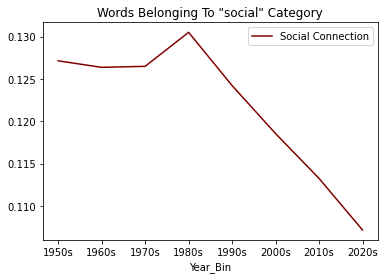

In [71]:
df[['Social Connection', 'Year_Bin']].groupby('Year_Bin').mean().plot(color='maroon', title='Words Belonging To "social" Category');

The average number of percentage of words belonging to 'social'category in LIWC 2007 in each song's lyrics, like "mate," "talk," "child", indicating people are becoming not willing to socialize.

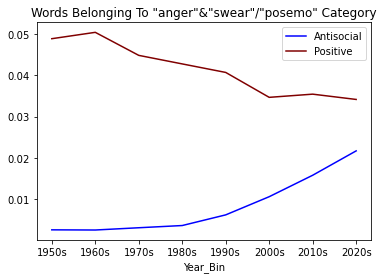

In [70]:
df[['Antisocial', 'Positive', 'Year_Bin']].groupby('Year_Bin').mean().plot(color=['blue', 'maroon'], title='Words Belonging To "anger"&"swear"/"posemo" Category');

Antiocial: The average number of percentage of words belonging to 'anger' and 'swear' categories in LIWC 2007, like "kill," "hate," "annoyed" "damn," "piss", "fuck".

Positive: The average number of percentage of words belonging to 'posemo' categories LIWC 2007, like "love," "nice," "sweet".

People are becoming more antisocial and less pro-social.

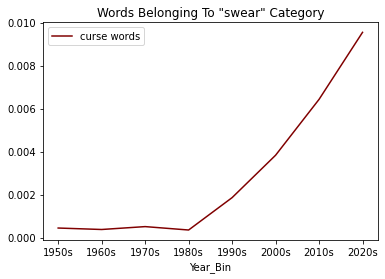

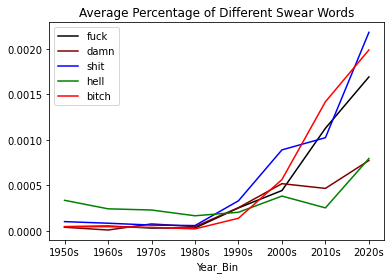

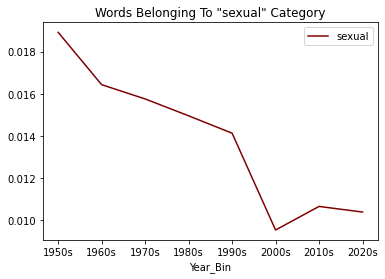

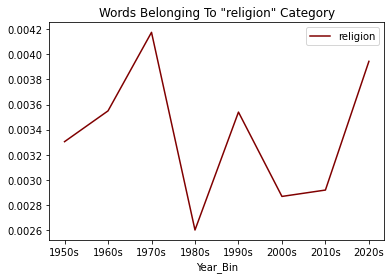

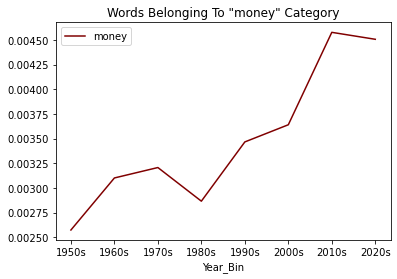

In [68]:
df[['curse words', 'Year_Bin']].groupby('Year_Bin').mean().plot(color='maroon', title='Words Belonging To "swear" Category');
df[['fuck', 'damn', 'shit', 'hell', 'bitch','Year_Bin']].groupby('Year_Bin').mean().plot(color=['black', 'maroon', 'blue', 'green', 'red'], title='Average Percentage of Different Swear Words');
df[['sexual', 'Year_Bin']].groupby('Year_Bin').mean().plot(color='maroon', title='Words Belonging To "sexual" Category');
df[['religion', 'Year_Bin']].groupby('Year_Bin').mean().plot(color='maroon', title='Words Belonging To "religion" Category');
df[['money', 'Year_Bin']].groupby('Year_Bin').mean().plot(color='maroon', title='Words Belonging To "money" Category');

Similar to the above graphs.

curse words: "damn," "piss", "fuck", etc

sexual: "horny," "love", "incest", etc

religion: "Altar", "church", "mosque", etc

money: "Audit", "cash", "owe", etc

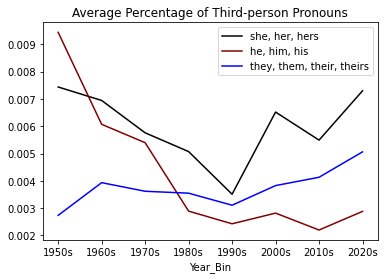

In [66]:
ax = df[['female','male','other', 'Year_Bin']].groupby('Year_Bin').mean().plot(color=['black', 'maroon', 'blue'], title='Average Percentage of Third-person Pronouns')
ax.legend(["she, her, hers", "he, him, his", "they, them, their, theirs"]);

The average number of percentage of words referring to third persons in each song's lyrics.

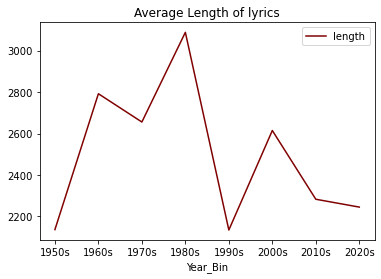

In [72]:
df[['length', 'Year_Bin']].groupby('Year_Bin').mean().plot(color='maroon', title = 'Average Length of lyrics');

The length of lyrics is changing dramatically.

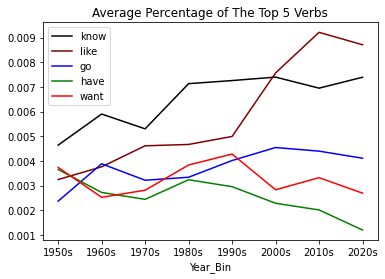

In [73]:
df[['know','like', 'go', 'have', 'want', 'Year_Bin']].groupby('Year_Bin').mean().plot(color=['black', 'maroon', 'blue', 'green', 'red'], title='Average Percentage of The Top 5 Verbs');

The average number of percentage of the top 5 verbs in each song's lyrics.

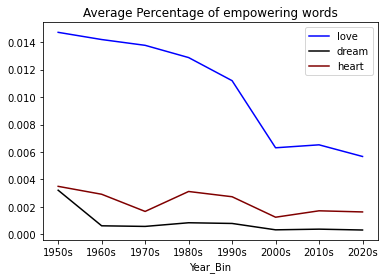

In [74]:
df[['love', 'dream', 'heart', 'Year_Bin']].groupby('Year_Bin').mean().plot(color=['blue', 'black', 'maroon'], title='Average Percentage of empowering words');

The average number of percentage of "love", "dream" and "heart" in each song's lyrics.

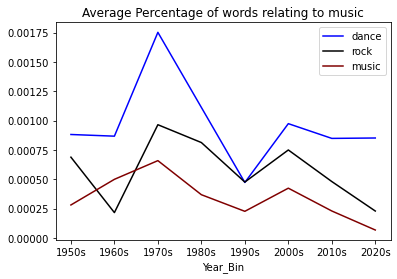

In [75]:
df[['dance', 'rock', 'music', 'Year_Bin']].groupby('Year_Bin').mean().plot(color=['blue', 'black', 'maroon'], title='Average Percentage of words relating to music');

The average number of percentage of "dance", "rock" and "music" in each song's lyrics.

# Takeaway

-self-focus / other-focus didn't change much

-people are becoming not willing to socialize

-people are also more negative(as we can see in "love", "dream", "heart")